# Statistics with Python!

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris

In [8]:
allstates = pd.read_csv('2008_all_states.csv')
allstates.head()

,state,county,total_votes,dem_votes,rep_votes,other_votes,dem_share,east_west
0,AK,"State House District 8, Denali-University",10320,4995,4983,342,50.06,west
1,AK,"State House District 37, Bristol Bay-Aleuti",4665,1868,2661,136,41.24,west
2,AK,"State House District 12, Richardson-Glenn H",7589,1914,5467,208,25.93,west
3,AK,"State House District 13, Greater Palmer",11526,2800,8432,294,24.93,west
4,AK,"State House District 14, Greater Wasilla",10456,2132,8108,216,20.82,west


In [10]:
swingstates = pd.read_csv('2008_swing_states.csv', header=0)
swingstates.head()

,state,county,total_votes,dem_votes,rep_votes,dem_share
0,PA,Erie County,127691,75775,50351,60.08
1,PA,Bradford County,25787,10306,15057,40.64
2,PA,Tioga County,17984,6390,11326,36.07
3,PA,McKean County,15947,6465,9224,41.21
4,PA,Potter County,7507,2300,5109,31.04


## Graphical EDA

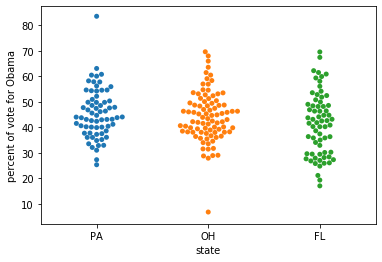

In [20]:
# Swarm Plots
_ = sns.swarmplot(x='state', y='dem_share', data=swingstates)
_ = plt.xlabel('state')
_ = plt.ylabel('percent of vote for Obama')
plt.show()

## Empirical Cumulative Distribution

In [22]:
x = np.sort(swingstates['dem_share'])

In [23]:
y = np.arange(1, len(x)+1 / len(x))

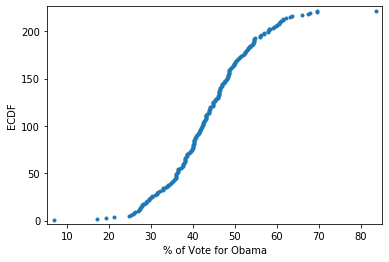

In [27]:
_ = plt.plot(x, y, marker = '.', linestyle = 'none')
_ = plt.xlabel('% of Vote for Obama')
_ = plt.ylabel('ECDF')
plt.margins(0.02)
plt.show()

In [28]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, len(x)+1) / n

    return x, y

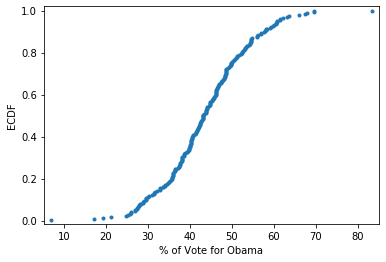

In [30]:
# using the function to calculate x and y - will be done often
x_vers, y_vers = ecdf(swingstates['dem_share'])
_ = plt.plot(x_vers, y_vers, marker = '.', linestyle = 'none')
_ = plt.xlabel('% of Vote for Obama')
_ = plt.ylabel('ECDF')
plt.margins(0.02)
plt.show()

In [33]:
x_dem, y_dem = ecdf(swingstates['dem_votes'])
x_rep, y_rep = ecdf(swingstates['rep_votes'])
#x_other, y_other = ecdf(swingstates['other_votes'])

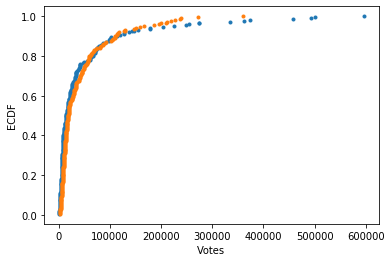

In [35]:
_ = plt.plot(x_dem, y_dem, marker = '.', linestyle = 'none')
_ = plt.plot(x_rep, y_rep, marker = '.', linestyle = 'none')

_ = plt.xlabel('Votes')
_ = plt.ylabel('ECDF')

# Quantitative EDA

<img src="ecdf-percentiles.JPG">

In [37]:
np.percentile(swingstates['dem_share'],[25,50,75])

array([37.3025, 43.185 , 49.925 ])

<img src="box-plots-diag.JPG">

In [45]:
percentiles = np.array([10, 25,50, 75, 90])
ptiles_vers=np.percentile(swingstates['dem_share'], percentiles)
percentiles, ptiles_vers

(array([10, 25, 50, 75, 90]),
 array([29.543 , 37.3025, 43.185 , 49.925 , 57.873 ]))

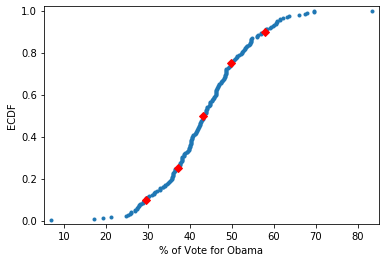

In [50]:
#_ = plt.plot(x_vers, y_vers, marker = '.', linestyle = 'none')
_ = plt.plot(x_vers, y_vers, marker = '.', linestyle = 'none')
_ = plt.plot(ptiles_vers, percentiles/100, marker='D', color='red', linestyle='none')
_ = plt.xlabel('% of Vote for Obama')
_ = plt.ylabel('ECDF')
plt.margins(0.02)
plt.show()


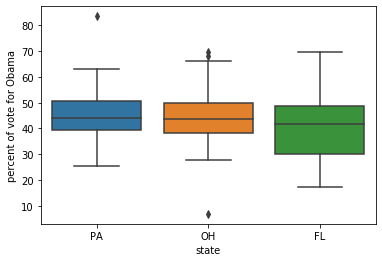

In [51]:
# Box Plots
_ = sns.boxplot(x='state', y='dem_share', data=swingstates)
_ = plt.xlabel('state')
_ = plt.ylabel('percent of vote for Obama')
plt.show()

## Variance and Standard Deviation

In [55]:
variance = np.var(swingstates['dem_share'])
std_computed = np.sqrt(variance)
print(variance, std_computed)

114.24649492735979 10.688615201575917


In [57]:
std_function = np.std(swingstates['dem_share'])
std_function

10.688615201575917

## Covariance and Pearson Correlation and Scatter Plot

<img src="covariance-diag.JPG">

In [58]:
swingstates.head()

,state,county,total_votes,dem_votes,rep_votes,dem_share
0,PA,Erie County,127691,75775,50351,60.08
1,PA,Bradford County,25787,10306,15057,40.64
2,PA,Tioga County,17984,6390,11326,36.07
3,PA,McKean County,15947,6465,9224,41.21
4,PA,Potter County,7507,2300,5109,31.04


In [62]:
# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov((swingstates['total_votes']/1000), swingstates['dem_share'])

# Print covariance matrix
print(covariance_matrix)

# Extract covariance of length and width of petals: petal_cov
vote_cov=(covariance_matrix[0,1])


# Print the length/width covariance
print(vote_cov)

[[20245.10393632   817.30936184]
 [  817.30936184   114.76344739]]
817.3093618405286


In [63]:
# function to compute pearson correlation
def pearson_r(x,y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

In [64]:
pearson_r((swingstates['total_votes']/1000), swingstates['dem_share'])

0.5361973649586781

## Probability

In [69]:
draw = np.random.random(35)
draw

0.539340462156263

In [73]:
np.random.random(35)
random_numbers = np.random.random(size = 4)
random_numbers

array([0.29130555, 0.4089089 , 0.87131635, 0.12186465])

In [74]:
heads = random_numbers < 0.5
heads

array([ True,  True, False,  True])

In [75]:
np.sum(heads)

3

In [77]:
# rolling the die over and over:

n_all_heads = 0
for _ in range(10000):
    heads = np.random.random(size = 4) < 0.5
    n_heads = np.sum(heads)
    if n_heads == 4:
        n_all_heads += 1

n_all_heads / 10000

0.0612

In [78]:
#########################

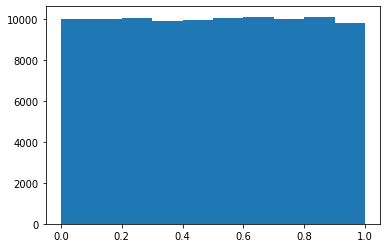

In [79]:
# Seed the random number generator
np.random.seed(42)

# Initialize random numbers: random_numbers
random_numbers = np.empty(100000)

# Generate random numbers by looping over range(100000)
for i in range(100000):
    random_numbers[i] = np.random.random()

# Plot a histogram
_ = plt.hist(random_numbers)

# Show the plot
plt.show()

 The histogram is almost exactly flat across the top, indicating that there is equal chance that a randomly-generated number is in any of the bins of the histogram.

In [96]:
# Bernoulli Trials Function
def perform_bernoulli_trials(n, p):
    #np.random.seed(442)
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success += 1

    return n_success

In [92]:
perform_bernoulli_trials(50, .5)

26

### How many defaults might we expect? <br>
Let's say a bank made 100 mortgage loans. It is possible that anywhere between 0 and 100 of the loans will be defaulted upon. You would like to know the probability of getting a given number of defaults, given that the probability of a default is p = 0.05. To investigate this, you will do a simulation. You will perform 100 Bernoulli trials using the perform_bernoulli_trials() function you wrote in the previous exercise and record how many defaults we get. Here, a success is a default. (Remember that the word "success" just means that the Bernoulli trial evaluates to True, i.e., did the loan recipient default?) You will do this for another 100 Bernoulli trials. And again and again until we have tried it 1000 times. Then, you will plot a histogram describing the probability of the number of defaults.

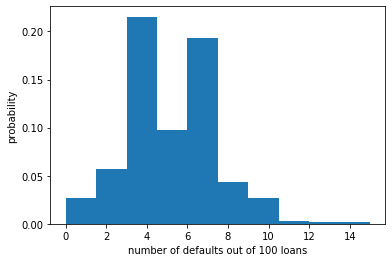

In [99]:
# Seed random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults = np.empty(1000)

# Compute the number of defaults
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)

# Plot the histogram with default number of bins; label your axes
_ = plt.hist(n_defaults, density=True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()

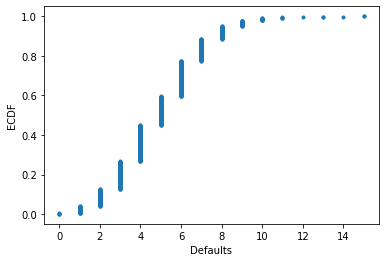

Probability of losing money = 0.022


In [100]:
# Compute ECDF: x, y
x,y = ecdf(n_defaults)

# Plot the ECDF with labeled axes
_ = plt.plot(x, y, marker = '.', linestyle = 'none')
_ = plt.xlabel('Defaults')
_ = plt.ylabel('ECDF')


# Show the plot
plt.show()

# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money
n_lose_money = np.sum(n_defaults >= 10)

# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))

# This was an example of a probablity mass function 

## Binomial Distribution